# 数据集

emotion数据集：包括6种基本情感：

- anger 愤怒
- disgust 厌恶
- fear 恐惧
- joy 喜悦
- sadness 悲伤
- surprise 惊讶

In [2]:
!pip install huggingface_hub

## Hugging Face Datasets 库

### 列举数据集

In [7]:
from huggingface_hub import list_datasets

all_datasets = list(list_datasets())
print(f"Hugging Face Hub 当前存在{len(all_datasets)}个数据集。")
print(f"前10个数据集：{all_datasets[:10]}")

Hugging Face Hub 当前存在137189个数据集。
前10个数据集：[DatasetInfo(id='acronym_identification', author=None, sha='15ef643450d589d5883e289ffadeb03563e80a9e', created_at=datetime.datetime(2022, 3, 2, 23, 29, 22, tzinfo=datetime.timezone.utc), last_modified=datetime.datetime(2024, 1, 9, 11, 39, 57, tzinfo=datetime.timezone.utc), private=False, gated=False, disabled=False, downloads=539, likes=18, paperswithcode_id='acronym-identification', tags=['task_categories:token-classification', 'annotations_creators:expert-generated', 'language_creators:found', 'multilinguality:monolingual', 'size_categories:10K<n<100K', 'source_datasets:original', 'language:en', 'license:mit', 'acronym-identification', 'croissant', 'arxiv:2010.14678', 'region:us'], card_data=None, siblings=None), DatasetInfo(id='ade_corpus_v2', author=None, sha='4ba01c71687dd7c996597042449448ea312126cf', created_at=datetime.datetime(2022, 3, 2, 23, 29, 22, tzinfo=datetime.timezone.utc), last_modified=datetime.datetime(2024, 1, 9, 11, 42, 58, t

### 加载数据集

In [5]:
from datasets import load_dataset

emotions = load_dataset("emotion", trust_remote_code=True)
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [6]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [7]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


### 从Datasets到DataFrame

In [25]:
import pandas as pd

emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [9]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


### 查看类分布

In [ ]:
!pip install matplotlib

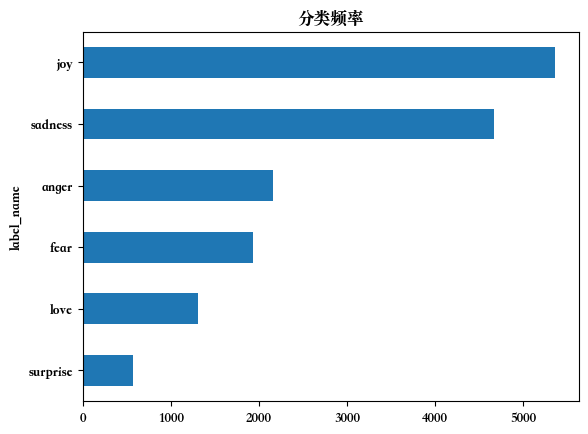

In [17]:
import matplotlib.pyplot as plt
import matplotlib

# 设置字体为Songti SC
matplotlib.rcParams['font.sans-serif'] = ['Songti SC']

df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("分类频率")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

# 设置字体为PingFang SC
matplotlib.rcParams['font.sans-serif'] = ['PingFang SC']

df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("分类频率")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

# 设置字体为SimHei
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("分类频率")
plt.show()

### 这些推文有多长？

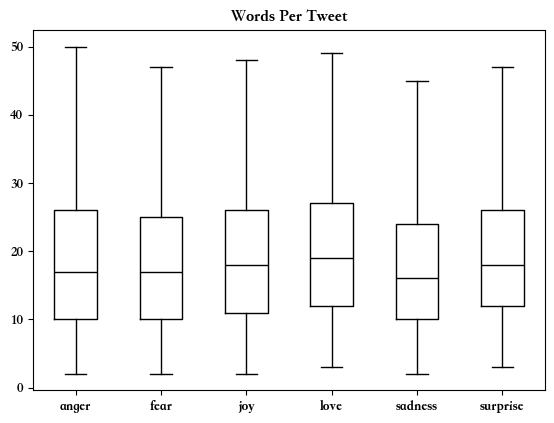

In [20]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot(
    "Words Per Tweet",
    by="label_name",
    grid=False,
    showfliers=False,
    color="black"
)
plt.suptitle("")
plt.xlabel("")
plt.show()

In [23]:
emotions.reset_format()

In [24]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

## 将文本转换成词元